In [6]:
import pandas as pd
import seaborn as sns

#Conectar datos

In [7]:
from google.colab import drive
drive.mount('/content/drive')
link ="/content/drive/MyDrive/Proyectos/UNMSM/Dataset/Resultados 2026-I.xlsx"
datos = pd.read_excel(link)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26518 entries, 0 to 26517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   codigo       26518 non-null  int64  
 1   nombre       26518 non-null  object 
 2   escuela      26518 non-null  object 
 3   puntaje      26179 non-null  float64
 4   merito       2772 non-null   float64
 5   observacion  3111 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.2+ MB


#Manejo de datos faltantes

In [ ]:
#Cantidad de valores nulos
datos.isnull().sum()

,0
codigo,0
nombre,0
escuela,0
puntaje,339
merito,23746
observacion,23407


codigo          0.000000
nombre          0.000000
escuela         0.000000
puntaje         1.278377
merito         89.546723
observacion    88.268346
dtype: float64


<Axes: >

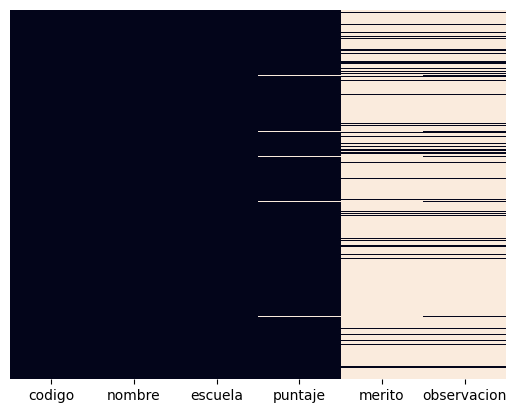

In [ ]:
datos_porcentaje=datos.isnull().mean()*100
print(datos_porcentaje)
sns.heatmap(datos.isnull(),yticklabels=False,cbar=False)

In [9]:
# Rellenar columna(observacion)
tabla_limpieza=datos.copy()
tabla_limpieza['observacion']=tabla_limpieza['observacion'].fillna("NO ALCANZÓ VACANTE")


In [10]:
#Rellenar columna(puntaje)
tabla_limpieza['puntaje']=tabla_limpieza['puntaje'].fillna(0)

# Limpieza y transformacion

In [11]:
# Eliminar columna(merito)
tabla_limpieza.drop(['merito'],axis=1,inplace=True)

In [12]:
#Visualizar los datos
tabla_porcentaje=tabla_limpieza.isnull().mean()*100
print(tabla_porcentaje)

codigo         0.0
nombre         0.0
escuela        0.0
puntaje        0.0
observacion    0.0
dtype: float64


# Agrupado

In [14]:
#Conteo de alcanzo vacante
df_admision=tabla_limpieza.copy()

In [15]:
agrup_admision = df_admision.groupby(['observacion']).count()
agrup_admision.head()

,codigo,nombre,escuela,puntaje
observacion,,,,
ALCANZÓ VACANTE,2772,2772,2772,2772
AUSENTE,339,339,339,339
NO ALCANZÓ VACANTE,23407,23407,23407,23407


In [ ]:
df_admision.sample(10)

,codigo,nombre,escuela,puntaje,observacion
6682,726605,"RUBINA MACAVILCA, MELLANY MARCEELA",DERECHO,713.625,NO ALCANZÓ VACANTE
16280,384064,"MILLONES VELASQUEZ, JOSUE MIGUEL",INGENIERÍA MECATRONICA,1002.500,NO ALCANZÓ VACANTE
21305,853851,"RODRIGUEZ CASTAÑEDA, YOSELIN KATHERINE",MEDICINA HUMANA,725.000,NO ALCANZÓ VACANTE
20022,871719,"LOPEZ ANDRADE, YAJAIRA YAZMIN",MEDICINA HUMANA,970.375,NO ALCANZÓ VACANTE
1509,573235,"SANCHEZ CASTRO, ORLANDO FARIQ",ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES - LIMA,704.500,NO ALCANZÓ VACANTE
2724,384456,"ROMAN ROBLES, MATHÍAS ANDRE",ARQUITECTURA Y URBANISMO,872.375,NO ALCANZÓ VACANTE
17583,218327,"GARAY SALINAS, NEIL JONATAN",MATEMÁTICA,1080.750,ALCANZÓ VACANTE
20178,860203,"MARCELO QUISPE, VALERIA AYMARA",MEDICINA HUMANA,820.875,NO ALCANZÓ VACANTE
23609,108762,"CANCHARI JACINTO, FERNANDA LUCIA",ODONTOLOGÍA,835.625,NO ALCANZÓ VACANTE
4431,557871,"HACHA LOAIZA, JADE CELESTE",CONTABILIDAD - LIMA,869.500,NO ALCANZÓ VACANTE


#Descargar

In [ ]:
from google.colab import files

# Guardar CSV
df_admision.to_csv("dataset_admision.csv", index=False, encoding="utf-8")


# Descargar a tu PC
files.download("dataset_admision.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>